In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

# visualize 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Let's predict the future of weather!

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Goals
- The goal of this project is to go through the data science pipeline and deliver a model that will forecast the temperature into the future.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Planning

- Create README.md with data dictionary, project and business goals, and come up with initial hypotheses.

- Acquire data from the Codeup Database and create a function to automate this process. 
- Clean and prepare data for the first iteration through the pipeline. Create a function to automate the process. 
- Store the acquisition and preparation functions in a wrangle.py module function, and prepare data in Final Report Notebook by importing and using the function.
- Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train at least 3 different regression models.
- Evaluate models on train and validate datasets.
- Choose the model that performs the best and evaluate that single model on the test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Wrangling/Train, Test Split

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [2]:
# Obtaining data from the CodeUP database through a SQL query that can be found in wrangle.py
df = pd.read_csv('temp.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df.shape

(8599212, 7)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
#Checking for null values
df.isnull().sum()

dt                                    0
averagetemperature               364130
averagetemperatureuncertainty    364130
city                                  0
country                               0
latitude                              0
longitude                             0
dtype: int64

In [6]:
# Dropping any nulls from data set
df = df.dropna()

In [7]:
#Checking for null values
df.isnull().sum()

dt                               0
averagetemperature               0
averagetemperatureuncertainty    0
city                             0
country                          0
latitude                         0
longitude                        0
dtype: int64

In [8]:
# converting the units of the data we are ingesting
df.averagetemperature = (df.averagetemperature * 1.8) + 32

In [9]:
df.dtypes

dt                                object
averagetemperature               float64
averagetemperatureuncertainty    float64
city                              object
country                           object
latitude                          object
longitude                         object
dtype: object

In [10]:
# Changing dt column to datetime format
df.dt = pd.to_datetime(df.dt, format= '%Y/%m/%d')


In [11]:
# Setting index as the dates
df = df.set_index('dt')
df.head()

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude
dt,,,,,,
1743-11-01,42.9224,1.737,Århus,Denmark,57.05N,10.33E
1744-04-01,42.4184,3.624,Århus,Denmark,57.05N,10.33E
1744-05-01,51.1592,1.283,Århus,Denmark,57.05N,10.33E
1744-06-01,57.2918,1.347,Århus,Denmark,57.05N,10.33E
1744-07-01,60.9476,1.396,Århus,Denmark,57.05N,10.33E


In [12]:
df.sort_index()

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude
dt,,,,,,
1743-11-01,42.9224,1.737,Århus,Denmark,57.05N,10.33E
1743-11-01,26.6522,2.369,Tambov,Russia,52.24N,42.04E
1743-11-01,42.0674,1.868,Saint Étienne,France,45.81N,3.46E
1743-11-01,26.5802,2.160,Orekhovo Zuevo,Russia,55.45N,39.69E
1743-11-01,35.4902,2.100,Grand Rapids,United States,42.59N,85.09W
...,...,...,...,...,...,...
2013-09-01,59.4536,1.056,Vancouver,Canada,49.03N,122.45W
2013-09-01,66.8714,1.054,Lakewood,United States,39.38N,104.05W
2013-09-01,81.7736,1.087,Miami,United States,26.52N,80.60W


In [13]:
# Choosing a city to focus in on
df = df[df.country == 'United States']
df = df[df.city == 'Los Angeles']
df.shape

(1977, 6)

In [14]:
# Making columns to further breakdown the time.
df['month'] = df.index.strftime('%B')

In [15]:
df.tail()

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
dt,,,,,,,
2013-05-01,66.2504,0.531,Los Angeles,United States,34.56N,118.70W,May
2013-06-01,72.3812,0.416,Los Angeles,United States,34.56N,118.70W,June
2013-07-01,77.1620,0.334,Los Angeles,United States,34.56N,118.70W,July
2013-08-01,75.6176,0.384,Los Angeles,United States,34.56N,118.70W,August
2013-09-01,73.9418,0.984,Los Angeles,United States,34.56N,118.70W,September


In [16]:
df.index.value_counts()

1849-01-01    1
1959-09-01    1
1959-07-01    1
1959-06-01    1
1959-05-01    1
             ..
1903-08-01    1
1903-07-01    1
1903-06-01    1
1903-05-01    1
2013-09-01    1
Name: dt, Length: 1977, dtype: int64

In [17]:
df = df[df.index >= '2000']

In [18]:
df

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
dt,,,,,,,
2000-01-01,51.3896,0.455,Los Angeles,United States,34.56N,118.70W,January
2000-02-01,50.4716,0.626,Los Angeles,United States,34.56N,118.70W,February
2000-03-01,54.2030,0.277,Los Angeles,United States,34.56N,118.70W,March
2000-04-01,60.2312,0.347,Los Angeles,United States,34.56N,118.70W,April
2000-05-01,66.3314,0.317,Los Angeles,United States,34.56N,118.70W,May
...,...,...,...,...,...,...,...
2013-05-01,66.2504,0.531,Los Angeles,United States,34.56N,118.70W,May
2013-06-01,72.3812,0.416,Los Angeles,United States,34.56N,118.70W,June
2013-07-01,77.1620,0.334,Los Angeles,United States,34.56N,118.70W,July


### Now to spilt the data into Train, Test subsets

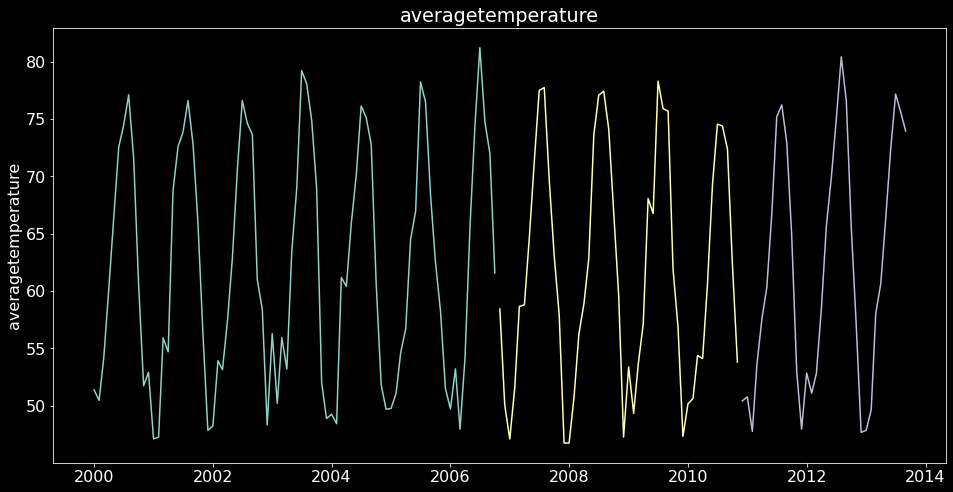

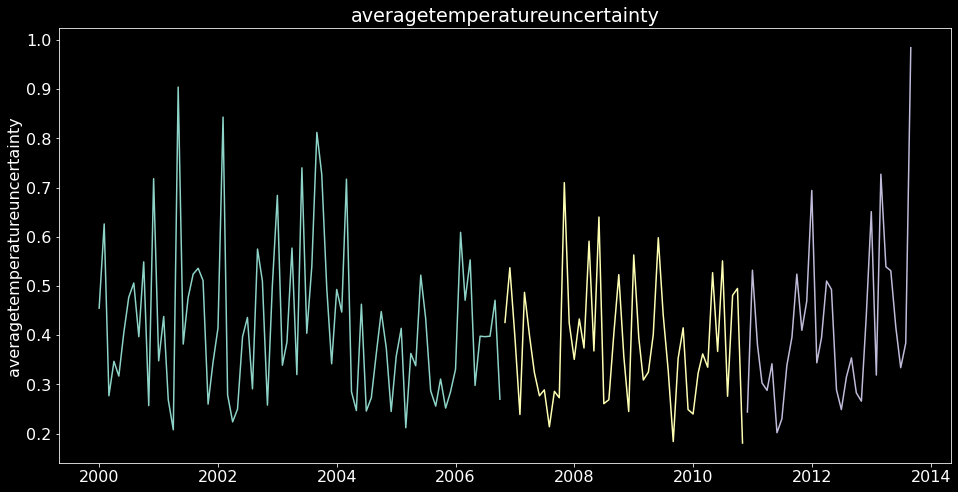

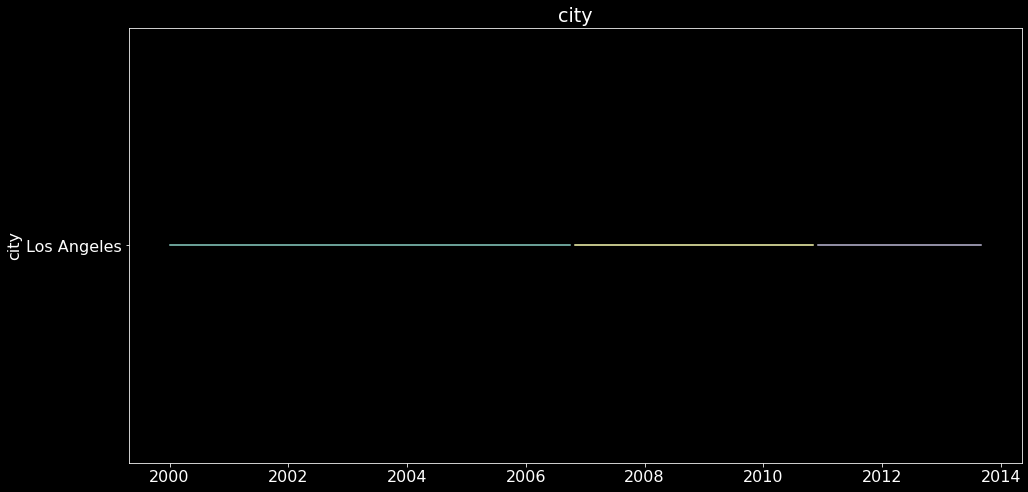

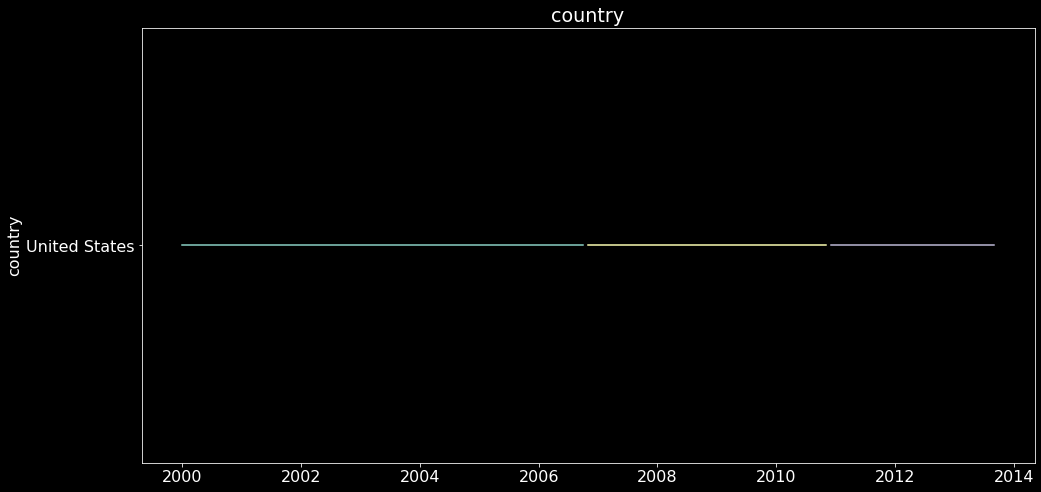

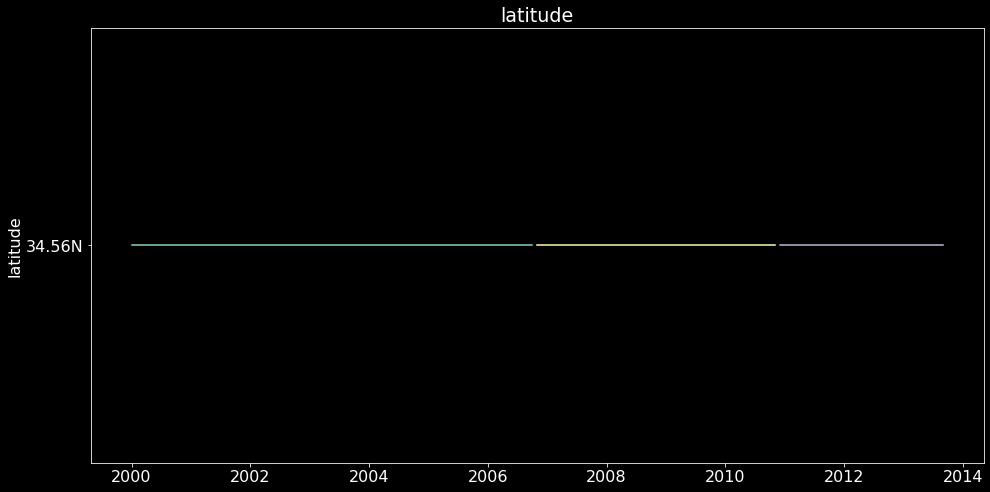

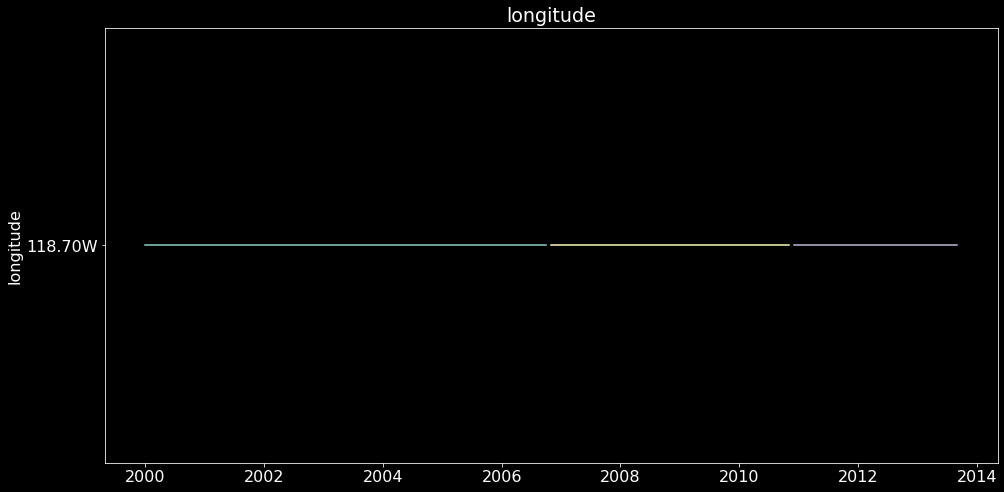

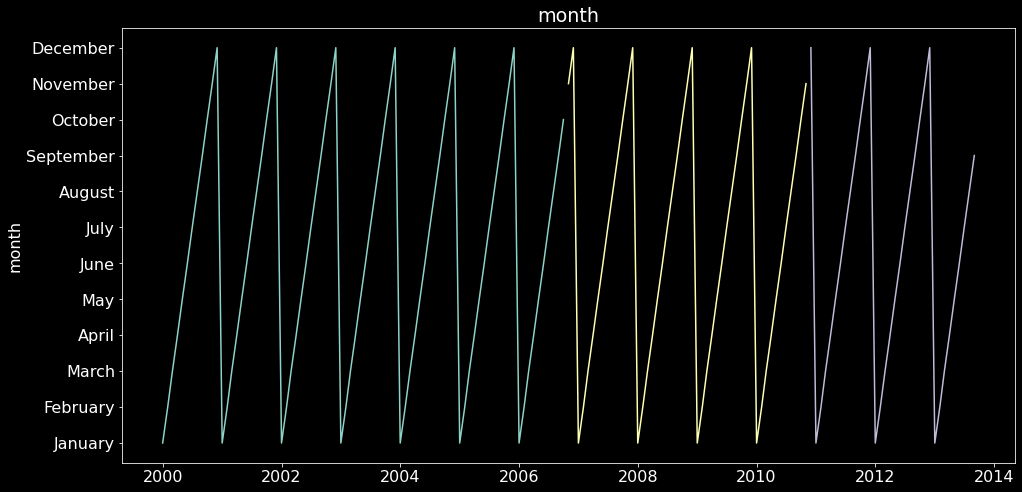

In [19]:
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

for col in train.columns:
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

##  Wrangling Takeaways
- We started off by pulling a SQL query for Single Family homes sold in 2017. 
- Approximately 52,000 observations were recieved from the CodeUP database using SQL.
- Following the Data Acquisition the following preparation work was done to the acquired data:
   - Removed columns and rows that were missing more than 50% of their data so as to ensure observations were suitable for this project.
   - Following data prepartion we were left with a dataframe consisting of 43,628 observations.
   - Split data into 3 datasets, train, validate and test.

# Intial Questions
- Does the county a property is located in affect it's log error?
- Does the tax variables of a house affect the logerror?
- Does the ratio of home sqft to lot sqft affect logerror?
- Does the year a house was built affect logerror?

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Exploration

- Looking for distribution of the target variable


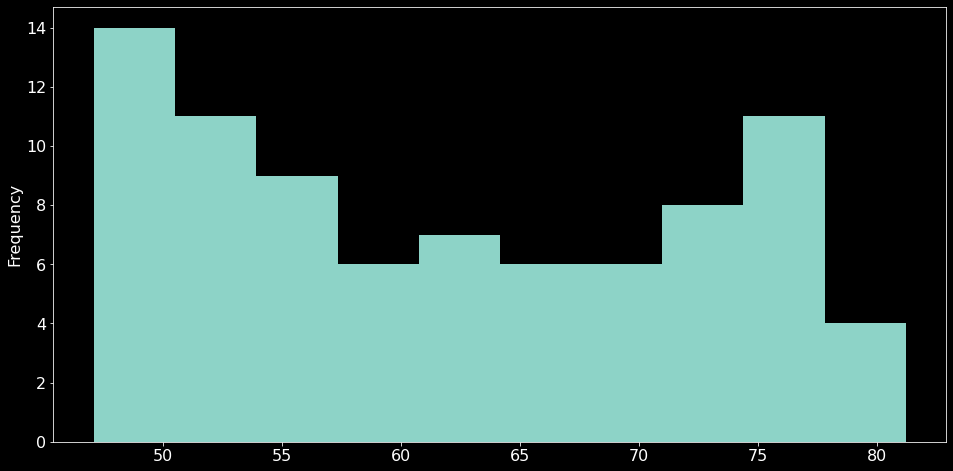

In [20]:
# We can make a histogram to show the distribution of our target variable:
y = train.averagetemperature
y.plot.hist()
plt.show()

## 1. Overtime how is Temperature Uncertainty affected?

Text(0, 0.5, 'Average Temperature')

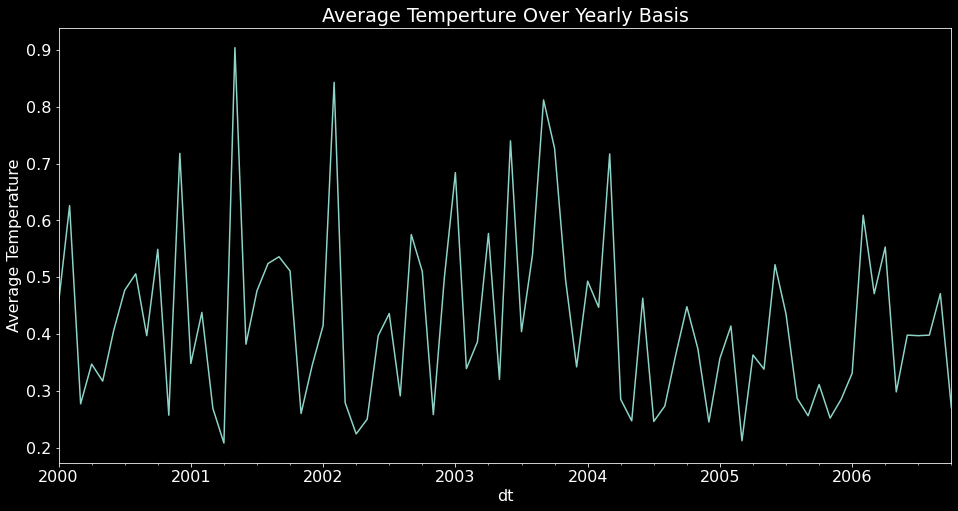

In [21]:
train.averagetemperatureuncertainty.resample('M').mean().plot(title='Average Temperture Over Yearly Basis')
plt.ylabel('Average Temperature')

#### Takeaways:
- For properties in ventura the logerror range seems to be lower than those in Orange county and Los Angeles.
- Let's see if statistical can help that statement.

#### County statistical testing
(H_0): No difference in logerror between homes in ventura and homes not in ventura.

(H_a): There is a difference in logerror between homes in ventura and homes not in ventura.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 2.How does the average temperature look when distributed across different time intervals?

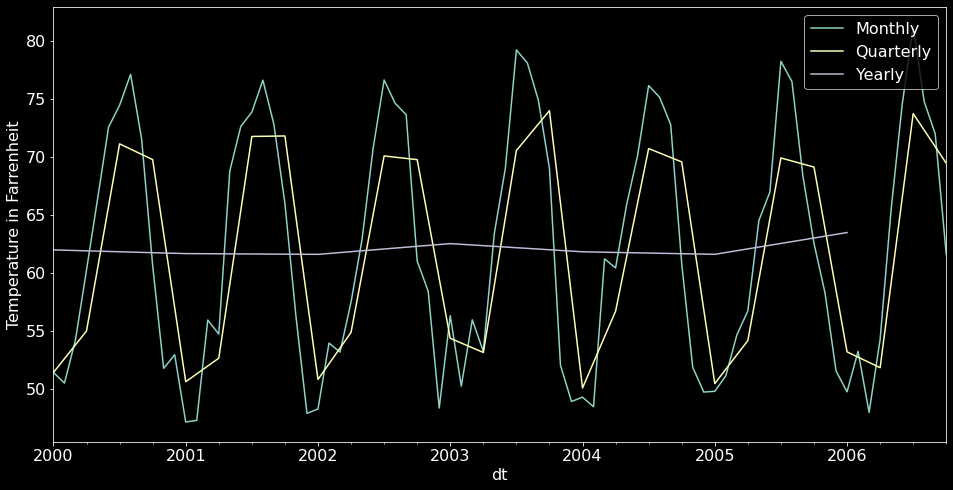

In [22]:
y.resample('M').mean().plot(label='Monthly')
y.resample('3M').mean().plot(label='Quarterly')
y.resample('Y').mean().plot(label='Yearly')
plt.ylabel('Temperature in Farrenheit')
plt.legend()
plt.show()

#### Takeaways
- From visualization it seems that  there does not seem to be a relationship between tax variables and logerror.
- Let's see if statistical can help that statement.

#### Tax_value testing
(H_0): There IS NOT a relationship between our value cluster and logerror. 

(H_a): There IS a relationship between value cluster and logerror.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 3. How radically does the temperature change over time?

Text(0, 0.5, 'Temperature Differences')

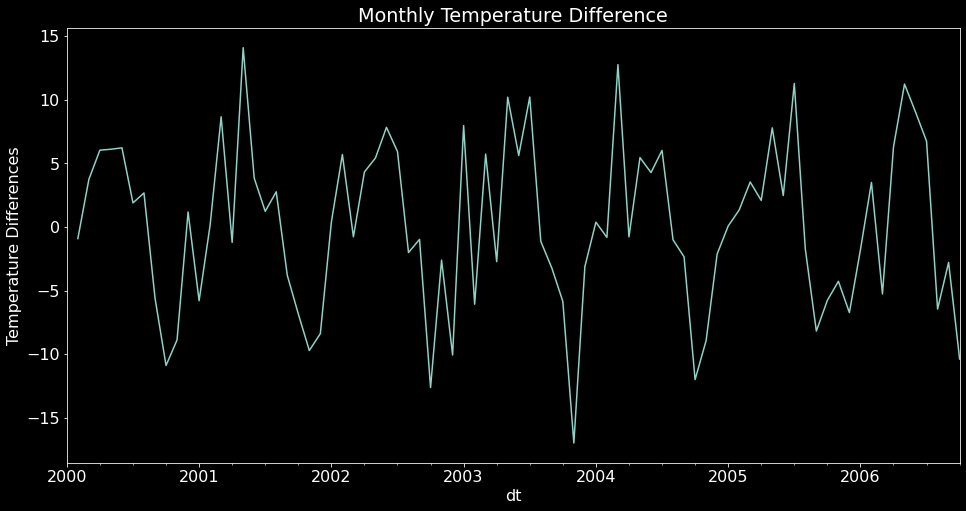

In [23]:
y.diff().plot()
plt.title('Monthly Temperature Difference')
plt.ylabel('Temperature Differences')

### Binning temp

In [24]:
train['at_bin'] = pd.qcut(train.averagetemperature, 4, labels=['low', 'low-mid', 'mid-high', 'high'])
train.groupby('at_bin').min()

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
at_bin,,,,,,,
low,47.1164,0.245,Los Angeles,United States,34.56N,118.70W,December
low-mid,53.1464,0.208,Los Angeles,United States,34.56N,118.70W,April
mid-high,60.9998,0.247,Los Angeles,United States,34.56N,118.70W,June
high,72.5432,0.246,Los Angeles,United States,34.56N,118.70W,August


In [25]:
train.groupby('at_bin').max()

,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
at_bin,,,,,,,
low,52.9160,0.718,Los Angeles,United States,34.56N,118.70W,November
low-mid,60.7640,0.843,Los Angeles,United States,34.56N,118.70W,October
mid-high,71.9618,0.904,Los Angeles,United States,34.56N,118.70W,September
high,81.2048,0.812,Los Angeles,United States,34.56N,118.70W,September


## 4. Overtime, does the temperature consistenly fall in same temperature range?

Text(0, 0.5, '% of days in the month')

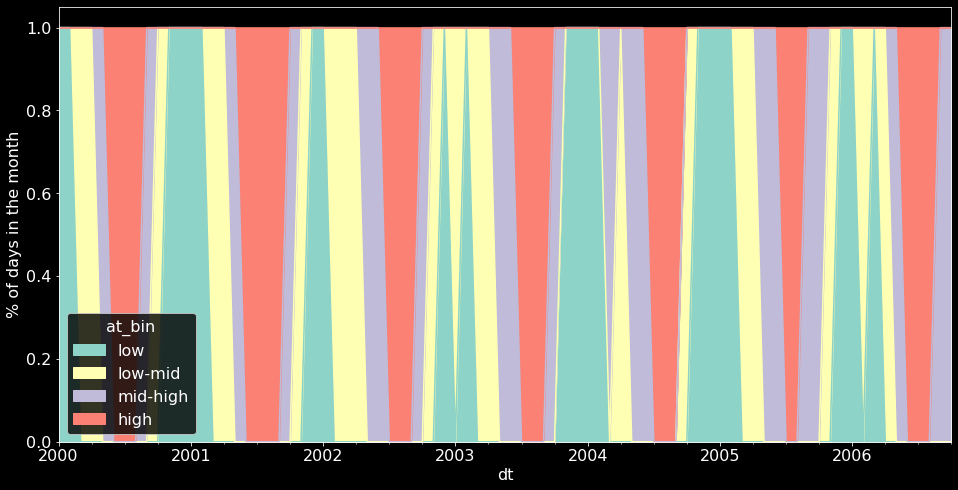

In [26]:
(train.groupby('at_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

## Takeaways
- In this visual the clusters are not very helpful in that it just seems to split the data every 20 percent.
- It seems visually that once a home takes up more than 60 percent of the lotsize log error becomes closer to 0.
- Let's see if statistical can help that statement.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Exploration Summary


- We chose features to investigate, and created clusters for those selected features to see if they could assist in finding drivers for logerror. Of all the features selected only the tax variables showed a relationship towards logerror.

- Whatever the case we will take these features into modeling and see if they assist in improving logerror prediction.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling 



#### - We will now go through using the features we investigated to see how they do with modeling.
#### - Prior to modeling let's scale our data with the investigated features to better acclimate them for modeling.

In [27]:
## Dropping temperature uncertainty column
train = train.drop(columns='averagetemperatureuncertainty')
validate = validate.drop(columns='averagetemperatureuncertainty')
test = test.drop(columns='averagetemperatureuncertainty')

## Last Observed Value: The future will look like the now

In [28]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [29]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [30]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [31]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [32]:
# take the last item of amount and assign to variable
temp = train['averagetemperature'][-1:][0]
temp

61.5794

In [33]:
yhat_df = pd.DataFrame(
    {'averagetemperature': [temp]},
    index=validate.index)

yhat_df.head()

,averagetemperature
dt,
2006-11-01,61.5794
2006-12-01,61.5794
2007-01-01,61.5794
2007-02-01,61.5794
2007-03-01,61.5794


averagetemperature -- RMSE: 10


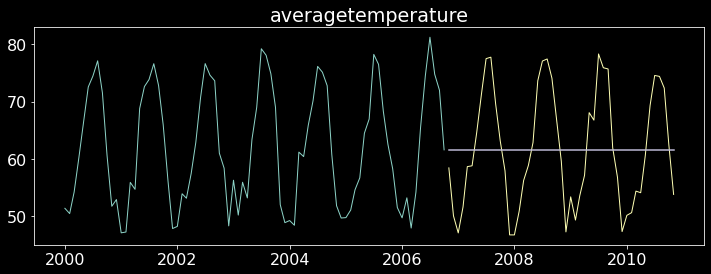

In [34]:
plot_and_eval('averagetemperature')

In [35]:

eval_df = append_eval_df(model_type = 'last_observed_value', 
                            target_var = 'averagetemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0


## Simple Average: The future will look, on average, like history.

In [36]:
# compute simple average
temp = round(train['averagetemperature'].mean(), 2)
temp

62.04

In [37]:
def make_predictions(amount=None):
    yhat_df = pd.DataFrame({'averagetemperature': [temp]},
                          index=validate.index)
    return yhat_df

In [38]:
yhat_df = make_predictions(temp)
yhat_df.head()

,averagetemperature
dt,
2006-11-01,62.04
2006-12-01,62.04
2007-01-01,62.04
2007-02-01,62.04
2007-03-01,62.04


averagetemperature -- RMSE: 10


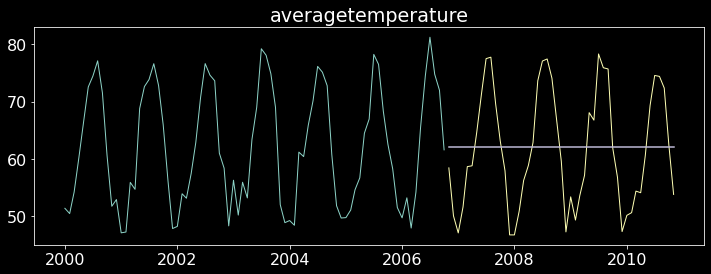

In [39]:
plot_and_eval('averagetemperature')

In [40]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0


## Moving Average

In [41]:
period = 3

# take 90 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
temp = round(train['averagetemperature'].rolling(period).mean()[-1], 2)
print(temp)

69.43


In [42]:
yhat_df = make_predictions(temp)
yhat_df.head()

,averagetemperature
dt,
2006-11-01,69.43
2006-12-01,69.43
2007-01-01,69.43
2007-02-01,69.43
2007-03-01,69.43


averagetemperature -- RMSE: 13


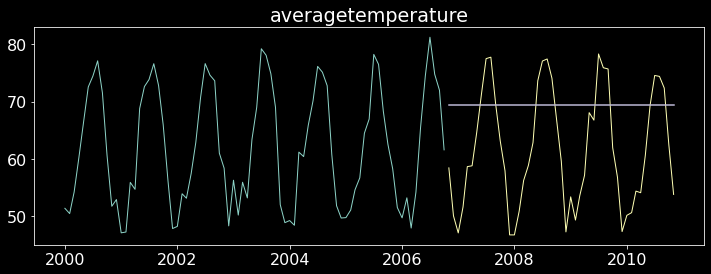

In [43]:
plot_and_eval('averagetemperature')

In [44]:
eval_df = append_eval_df(model_type='moving_average', 
                            target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,13.0


## Holt's Linear Trend

In [45]:
model = Holt(train['averagetemperature'], exponential = False)
model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)
yhat_items = model.predict(start = validate.index[0], 
                            end = validate.index[-1])
yhat_df['averagetemperature'] = round(yhat_items, 2)

averagetemperature -- RMSE: 14


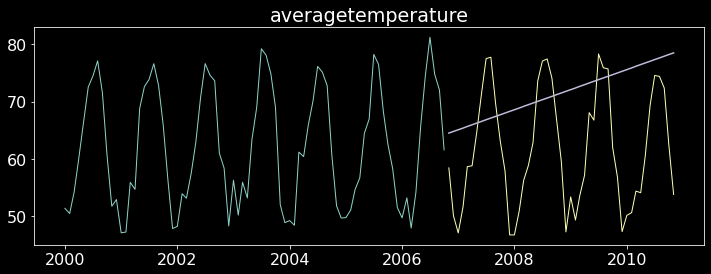

In [46]:
plot_and_eval('averagetemperature')


In [47]:
eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,13.0
3,Holts,averagetemperature,14.0


## Predict Based on Previous Cycle

In [48]:
# Resplit Data
train = df[:'2005']
validate = df['2010']
test = df['2012']


In [49]:
train.shape, validate.shape, test.shape

((72, 7), (12, 7), (12, 7))

In [50]:
yhat_df = pd.DataFrame(train['2005'].averagetemperature + train.averagetemperature.diff(12).mean())

In [51]:
yhat_df

,averagetemperature
dt,
2005-01-01,49.68971
2005-02-01,51.01991
2005-03-01,54.54611
2005-04-01,56.62691
2005-05-01,64.41011
2005-06-01,66.87431
2005-07-01,78.14051
2005-08-01,76.40171
2005-09-01,68.22071


In [52]:
pd.concat([yhat_df.head(1), validate.head(1)])


,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
dt,,,,,,,
2005-01-01,49.68971,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,50.16200,0.24,Los Angeles,United States,34.56N,118.70W,January


In [53]:
# set yhat_df to index of validate
yhat_df.index = validate.index

len(yhat_df)

12

averagetemperature -- RMSE: 3


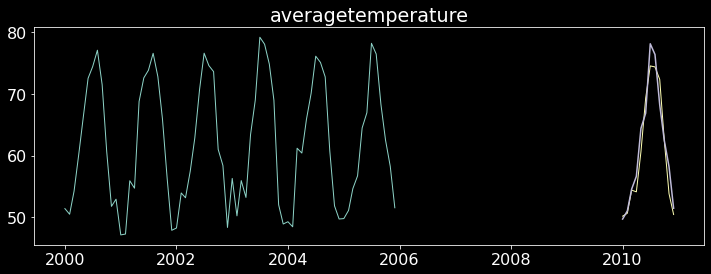

In [54]:
plot_and_eval('averagetemperature')

In [55]:
# Let's see how the models compare
eval_df = append_eval_df(model_type = 'previous year', target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,13.0
3,Holts,averagetemperature,14.0
4,previous year,averagetemperature,3.0


## Running on Test dataset

In [56]:
yhat_df = pd.DataFrame(validate.averagetemperature + train.averagetemperature.diff(12).mean())
yhat_df.index = test.index

In [58]:
rmse_avgtemp = round(sqrt(mean_squared_error(test['averagetemperature'], yhat_df['averagetemperature'])), 0)


In [59]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

rmse - average_temperature:  3.0


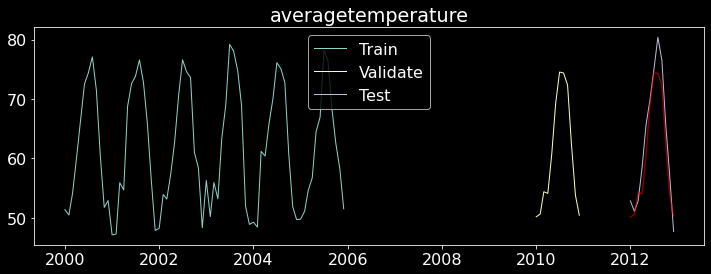

In [60]:
print("rmse - average_temperature: ", rmse_avgtemp)
plot_and_eval_test('averagetemperature')

## Modeling takeaways

- Of all models chosen the best performing model was the Previous Cycle Model with a RMSE of only 3.0 on the test dataset.

- With this being consistent among train, validate, and test sets. Further adjustments could be made to lower if needed.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Conclusions, Reccomendations and Next Steps

- Of the features we investigated, the tax variable features and location features showed a relationship towards logerror.

- With the housing market being so volatile and prone to being affected by outside forces it can be hard to predict both pricing and improve logerror.

- We believe that this dataset is simply too large and perhaps focusing in on smaller areas may provide some benefits.

- With that said our final conclusion is that the features elected for our model are not ones to be utilized and further research will need to be done to improve the logerror.

- Next steps after this project may be to choose different features and focus in on smaller areas with the 3 counties.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>